In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

### Read the data

In [ ]:
df = pd.read_csv('/content/RGB.csv')
df2= pd.read_csv('/content/ETP.csv')
df



,Red,Green,Blue


Convert frames to RGB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cap= cv2.VideoCapture('/content/drive/MyDrive/videoetp/etp.mp4')
i = 0
frame_skip = 60
while (cap.isOpened()):
  ret, frame = cap.read()
  if not ret:
    break
    
  if i > frame_skip - 1:
    b = frame[:, :, :1] 
    g = frame[:, :, 1:2] 
    r = frame[:, :, 2:] 
  
    # computing the mean 
    b_mean = np.mean(b) 
    g_mean = np.mean(g) 
    r_mean = np.mean(r)
    df=df.append({'Red': r_mean,'Green': g_mean,'Blue': b_mean},ignore_index=True)
    i = 0
    continue
  
  i += 1
cap.release()
cv2.destroyAllWindows()

In [ ]:
df

,Red,Green,Blue
0,145.885168,141.222541,142.446254
1,146.323083,141.264084,143.015569
2,145.572303,141.132422,142.245067
3,142.443296,138.039222,139.143286
4,146.499362,141.794685,142.769372
...,...,...,...
4543,130.387509,137.921986,147.160493
4544,128.943725,136.732111,146.096746
4545,126.361435,134.163081,143.285556
4546,126.447465,133.246493,141.529487


In [ ]:
df2

,Date,Temperature,pH,DO,Turbidity(V),TDS,EC,WQI,Normalised WQI,WQC,Verdict
0,8/15/2020,33.44,7.55,7.0,4.14,289.00,0.78,26.00,8.81,Very Good,0
1,8/15/2020,33.44,7.94,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0
2,8/15/2020,33.44,7.88,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0
3,8/15/2020,33.44,7.82,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0
4,8/15/2020,33.44,8.01,7.0,4.14,289.00,0.78,26.00,8.81,Very Good,0
...,...,...,...,...,...,...,...,...,...,...,...
4702,8/18/2020,33.57,7.88,7.0,4.14,284.41,0.77,25.78,8.74,Very Good,0
4703,8/18/2020,33.57,7.88,7.0,4.14,284.40,0.77,25.78,8.74,Very Good,0
4704,8/18/2020,33.57,7.88,7.0,4.14,284.40,0.77,25.78,8.74,Very Good,0
4705,8/18/2020,33.57,7.88,7.0,4.14,284.39,0.77,25.78,8.74,Very Good,0


In [ ]:
df2_mean = df2.mean()
df0=df2.replace(np.nan, df2_mean)
df0

,Date,Temperature,pH,DO,Turbidity(V),TDS,EC,WQI,Normalised WQI,WQC,Verdict
0,8/15/2020,33.44,7.55,7.0,4.14,289.00,0.78,26.00,8.81,Very Good,0
1,8/15/2020,33.44,7.94,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0
2,8/15/2020,33.44,7.88,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0
3,8/15/2020,33.44,7.82,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0
4,8/15/2020,33.44,8.01,7.0,4.14,289.00,0.78,26.00,8.81,Very Good,0
...,...,...,...,...,...,...,...,...,...,...,...
4702,8/18/2020,33.57,7.88,7.0,4.14,284.41,0.77,25.78,8.74,Very Good,0
4703,8/18/2020,33.57,7.88,7.0,4.14,284.40,0.77,25.78,8.74,Very Good,0
4704,8/18/2020,33.57,7.88,7.0,4.14,284.40,0.77,25.78,8.74,Very Good,0
4705,8/18/2020,33.57,7.88,7.0,4.14,284.39,0.77,25.78,8.74,Very Good,0


In [ ]:
print(df.dtypes)
print(df0.dtypes)

Red      float64
Green    float64
Blue     float64
dtype: object
Date               object
Temperature       float64
pH                float64
DO                float64
Turbidity(V)      float64
TDS               float64
EC                float64
WQI               float64
Normalised WQI    float64
WQC                object
Verdict             int64
dtype: object


In [ ]:
df1 = pd.DataFrame() 
df1=pd.merge(df0, df, left_index=True, right_index=True)
df1

,Date,Temperature,pH,DO,Turbidity(V),TDS,EC,WQI,Normalised WQI,WQC,Verdict,Red,Green,Blue
0,8/15/2020,33.44,7.55,7.0,4.14,289.00,0.78,26.00,8.81,Very Good,0,145.885168,141.222541,142.446254
1,8/15/2020,33.44,7.94,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0,146.323083,141.264084,143.015569
2,8/15/2020,33.44,7.88,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0,145.572303,141.132422,142.245067
3,8/15/2020,33.44,7.82,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0,142.443296,138.039222,139.143286
4,8/15/2020,33.44,8.01,7.0,4.14,289.00,0.78,26.00,8.81,Very Good,0,146.499362,141.794685,142.769372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,8/18/2020,33.55,7.88,7.0,4.14,285.15,0.77,25.82,8.75,Very Good,0,130.387509,137.921986,147.160493
4544,8/18/2020,33.55,7.88,7.0,4.14,285.15,0.77,25.82,8.75,Very Good,0,128.943725,136.732111,146.096746
4545,8/18/2020,33.55,7.88,7.0,4.14,285.14,0.77,25.82,8.75,Very Good,0,126.361435,134.163081,143.285556
4546,8/18/2020,33.55,7.88,7.0,4.14,285.14,0.77,25.82,8.75,Very Good,0,126.447465,133.246493,141.529487


Plotting

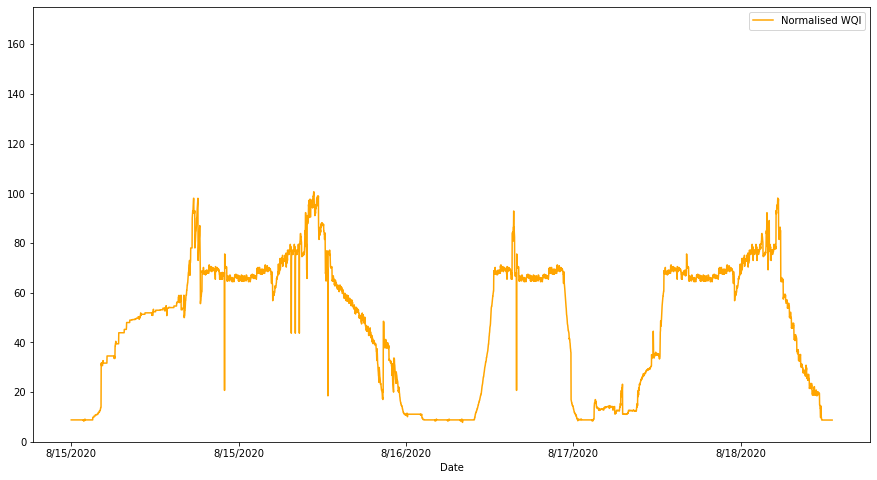

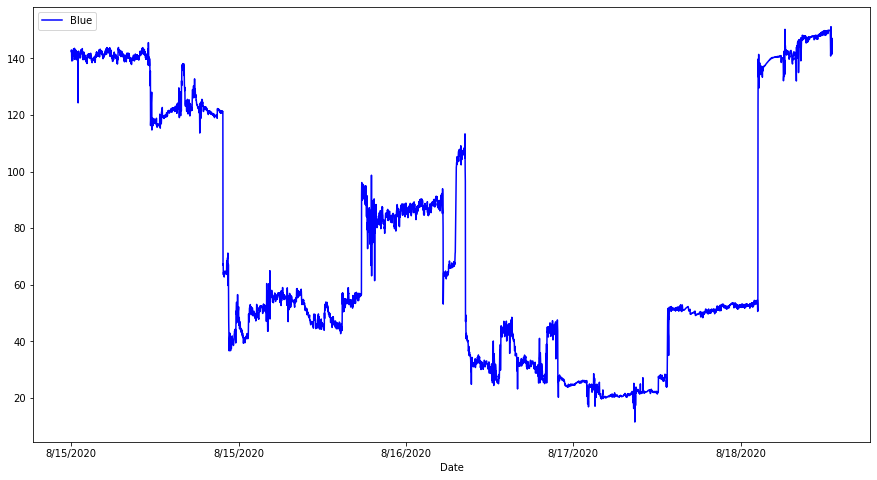

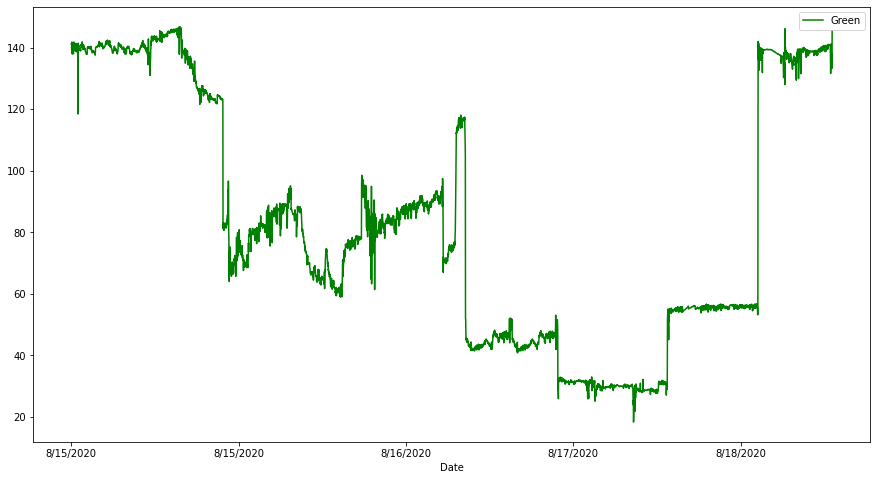

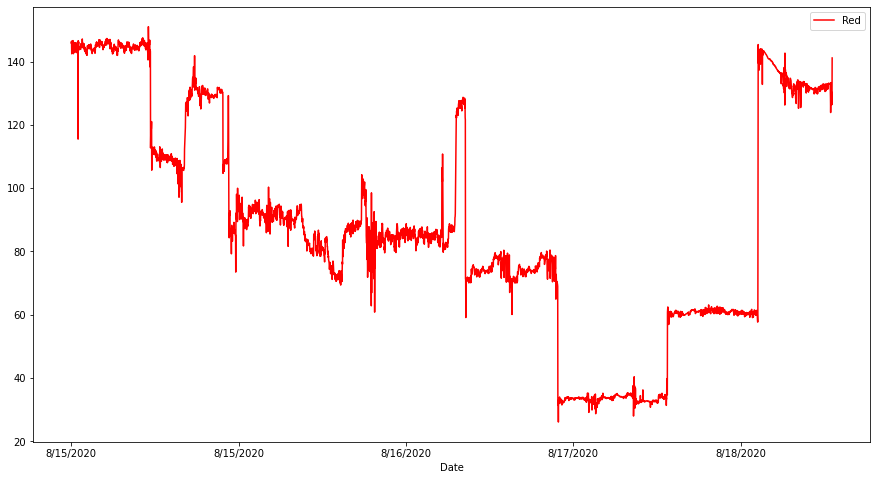

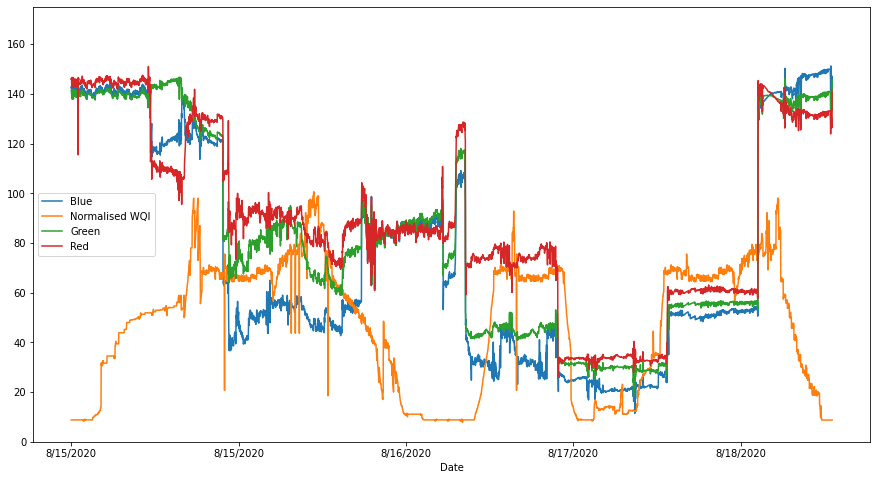

In [ ]:
df1.plot(0,8, kind = 'line', ylim=(0,175), figsize=(15,8), color='orange')
df1.plot(0,-1, kind = 'line', color='Blue', figsize=(15,8))
df1.plot(0,-2, kind = 'line', color='green', figsize=(15,8))
df1.plot(0,-3, kind = 'line', color='red', figsize=(15,8))
df1.plot(0, [-1,8,-2,-3], kind = 'line', figsize=(15,8))
ax = plt.gca()
ax.set_ylim([0,175])
plt.show()